<a href="https://colab.research.google.com/github/imarosan/Resume/blob/main/RankingNBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install unidecode
import pandas as pd
from pandas.core.algorithms import value_counts
import numpy as np
import matplotlib.pyplot as plt
from unidecode import unidecode
import seaborn as sns


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.2 MB/s eta 0:00:00


# Box Score DataFrame

In [ ]:
datbox = pd.read_csv('/content/NBA Player Box Score Stats(1950 - 2022).csv')
boxdf = datbox.loc[datbox['Season'] > 1999]
boxdf = boxdf.rename(columns={"PLAYER_NAME": "Player"})
boxdf['Player'] = boxdf['Player'].apply(unidecode)
boxdf


,Unnamed: 0,Season,Game_ID,Player,Team,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
724851,445916,2000,20000016,A.C. Green,MIA,"NOV 01, 2000",MIA vs. ORL,W,15,2,...,3.0,4.0,0.0,0.0,1.0,1.0,2.0,5,15.0,0
724852,445913,2000,20000065,A.C. Green,MIA,"NOV 08, 2000",MIA vs. SEA,W,13,0,...,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0,-7.0,0
724853,445914,2000,20000035,A.C. Green,MIA,"NOV 04, 2000",MIA vs. PHI,L,6,1,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2,4.0,0
724854,445915,2000,20000031,A.C. Green,MIA,"NOV 03, 2000",MIA @ CHH,L,7,0,...,1.0,1.0,0.0,0.0,0.0,3.0,1.0,0,-10.0,0
724855,445945,2000,29900768,A.C. Green,LAL,"FEB 23, 2000",LAL @ CLE,W,28,4,...,0.0,1.0,2.0,0.0,0.0,0.0,4.0,8,-7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309773,1282549,2023,22200663,Ziaire Williams,MEM,"JAN 16, 2023",MEM vs. PHX,W,17,1,...,2.0,3.0,0.0,0.0,0.0,0.0,3.0,3,14.0,1
1309774,1282548,2023,22200672,Ziaire Williams,MEM,"JAN 18, 2023",MEM vs. CLE,W,17,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,-8.0,1
1309775,1282547,2023,22200690,Ziaire Williams,MEM,"JAN 20, 2023",MEM @ LAL,L,18,1,...,2.0,3.0,2.0,0.0,0.0,0.0,5.0,2,-2.0,1
1309776,1282546,2023,22200703,Ziaire Williams,MEM,"JAN 22, 2023",MEM @ PHX,L,26,6,...,4.0,5.0,0.0,0.0,0.0,3.0,2.0,16,5.0,1


#Player Stats Dataframe

In [ ]:
datplayer = pd.read_csv('/content/NBA Player Stats(1950 - 2022).csv')
datplayer.keys()
statsdf = datplayer.loc[datplayer['Season'] > 1999, ('Player','Pos','G')]
statsdf['Player'] = statsdf['Player'].apply(unidecode)
# dat2['Pos'].value_counts()
statsdf


,Player,Pos,G
14493,Tariq Abdul-Wahad,SG,61.0
14494,Tariq Abdul-Wahad,SG,46.0
14495,Tariq Abdul-Wahad,SG,15.0
14496,Shareef Abdur-Rahim,SF,82.0
14497,Cory Alexander,PG,29.0
...,...,...,...
28232,Thaddeus Young,PF,26.0
28233,Trae Young,PG,76.0
28234,Omer Yurtseven,C,56.0
28235,Cody Zeller,C,27.0


In [ ]:
print(len(datplayer), len(statsdf))

28237 13744


#Position Conditions

In [ ]:
conditions = [(statsdf['Pos'] == 'PG') | (statsdf['Pos'] == 'SG') | (statsdf['Pos'] == 'PG-SG') | (statsdf['Pos'] == 'SG-PG'),
              (statsdf['Pos'] == 'SF-SG') | (statsdf['Pos'] == 'SG-SF') | (statsdf['Pos'] == 'SG-PF') | (statsdf['Pos'] == 'PG-SF') | (statsdf['Pos'] == 'SG-PG-SF'),
              (statsdf['Pos'] == 'SF') | (statsdf['Pos'] == 'PF') | (statsdf['Pos'] == 'SF-PF') | (statsdf['Pos'] == 'PF-SF'),
              (statsdf['Pos'] == 'SF-C') | (statsdf['Pos'] == 'PF-C') | (statsdf['Pos'] == 'C-PF'),
              (statsdf['Pos'] == 'C')]
choices = ['G', 'G-F', 'F','F-C','C']
statsdf['Position'] = np.select(conditions, choices, default='None')
statsdf = statsdf.drop(columns=['Pos'])
# print(statsdf.loc[statsdf['Player'] == 'Luka Doncic'])
statsdf = statsdf.groupby(['Player','Position']).aggregate({'G':'sum'}).reset_index()
# print(statsdf.loc[statsdf['Player'] == 'Luka Doncic'])
PPos = statsdf.sort_values('G', ascending=False)
PPos = PPos.drop_duplicates(subset='Player', keep='first')
PPos.loc[PPos['Player'] == 'Luka Doncic']




,Player,Position,G
1751,Luka Doncic,G,264.0


#Merging

In [ ]:
merged = boxdf.merge(PPos, how='inner', on='Player')
# merged.loc[(merged['Player'] == 'LeBron James')]
# merged.keys()
# merged
# merged['Position'].value_counts()


#Totals DF

In [ ]:
totalsdf = merged.groupby(['Player','Position']).aggregate({'MIN':'sum','PTS':'sum','FGM':'sum','FGA':'sum','FG3M':'sum','FG3A':'sum','FTM':'sum','FTA':'sum',
                                                           'OREB':'sum','DREB':'sum','AST':'sum','STL':'sum','BLK':'sum','TOV':'sum','PF':'sum','PLUS_MINUS':'sum'})
totalsdf['FG%'] = round(totalsdf['FGM'] / totalsdf['FGA'],4)
totalsdf['FG3%'] = round(totalsdf['FG3M'] / totalsdf['FG3A'],4)
totalsdf['FT%'] = round(totalsdf['FTM'] / totalsdf['FTA'],4)
totalsdf = totalsdf.sort_values(['MIN'], ascending=False)
totalsdf = totalsdf.reset_index()
totalsdf = totalsdf.loc[totalsdf['MIN']>359]
# totalsdf

Player Query

In [ ]:
totalsdf['Position'].value_counts()
totalsdf.loc[(totalsdf['Player']=='Michael Jordan')]


,Player,Position,MIN,PTS,FGM,FGA,FG3M,FG3A,FTM,FTA,...,DREB,AST,STL,BLK,TOV,PF,PLUS_MINUS,FG%,FG3%,FT%
812,Michael Jordan,F,5127,3015,1230,2851.0,26.0,108.0,529,657.0,...,715.0,621.0,208.0,65.0,335.0,290.0,20.0,0.4314,0.2407,0.8052


#Average DataFrame

In [ ]:
TAVG = pd.DataFrame()

for i in totalsdf.keys():
  if i in ('Player','Position'):
    TAVG[i] = totalsdf[i]
  elif i in ('FG%','FG3%','FT%'):
    TAVG[i] = totalsdf[i]
  else:
    TAVG[i] = round((totalsdf[i]/totalsdf['MIN'])*36,2)

# TAVG['Player'] = totalsdf['Player']
# TAVG['Position'] = totalsdf['Position']
# TAVG['PTS'] = round((totalsdf['PTS']/totalsdf['MIN'])*36,2)
# TAVG['OREB'] = round((totalsdf['OREB']/totalsdf['MIN'])*36,2)
# TAVG['DREB'] = round((totalsdf['DREB']/totalsdf['MIN'])*36,2)
# TAVG['AST'] = round((totalsdf['AST']/totalsdf['MIN'])*36,2)
# TAVG['STL'] = round((totalsdf['STL']/totalsdf['MIN'])*36,2)
# TAVG['BLK'] = round((totalsdf['BLK']/totalsdf['MIN'])*36,2)
# TAVG['TOV'] = round((totalsdf['TOV']/totalsdf['MIN'])*36,2)
# TAVG['PF'] = round((totalsdf['PF']/totalsdf['MIN'])*36,2)
# TAVG['PLUS_MINUS'] = round((totalsdf['PLUS_MINUS']/totalsdf['MIN'])*36,2)
# TAVG['FG%'] = totalsdf['FG%']
# TAVG['FG3%'] = totalsdf['FG3%']
# TAVG['FT%'] = totalsdf['FT%']
# TAVG.sort_values(['PTS'], ascending=False)

TAVG

,Player,Position,MIN,PTS,FGM,FGA,FG3M,FG3A,FTM,FTA,...,DREB,AST,STL,BLK,TOV,PF,PLUS_MINUS,FG%,FG3%,FT%
0,LeBron James,F,36.0,25.71,9.41,18.65,1.50,4.36,5.38,7.32,...,5.99,6.93,1.46,0.71,3.30,1.73,4.80,0.5047,0.3438,0.7352
1,Dirk Nowitzki,F,36.0,22.37,7.92,16.80,1.41,3.70,5.13,5.82,...,7.12,2.57,0.84,0.90,1.72,2.47,4.82,0.4713,0.3817,0.8812
2,Joe Johnson,G,36.0,16.62,6.37,14.44,1.61,4.34,2.27,2.83,...,3.25,4.07,0.87,0.21,2.00,1.83,0.67,0.4415,0.3710,0.8025
3,Vince Carter,G,36.0,19.94,7.18,16.52,1.86,5.01,3.72,4.65,...,3.83,3.69,1.19,0.64,2.00,3.11,1.39,0.4343,0.3725,0.8003
4,Paul Pierce,F,36.0,20.86,6.83,15.32,1.68,4.58,5.54,6.84,...,5.08,3.74,1.34,0.56,2.79,2.84,2.75,0.4456,0.3661,0.8093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,Johnathan Motley,F,36.0,22.11,8.80,15.95,0.20,0.98,4.30,7.34,...,7.34,2.54,1.08,0.49,2.93,4.99,-4.70,0.5521,0.2000,0.5867
1622,Charlie Brown Jr.,G,36.0,8.83,2.84,9.91,0.88,4.12,2.26,2.45,...,3.34,1.67,1.57,0.78,1.37,3.92,-3.53,0.2871,0.2143,0.9200
1623,Eric Murdock,G,36.0,12.10,4.23,10.62,0.98,2.46,2.66,4.13,...,3.64,5.31,2.46,0.10,3.25,2.95,-9.15,0.3981,0.4000,0.6429
1624,Morris Almond,G,36.0,11.80,4.26,11.21,0.69,2.38,2.58,3.47,...,3.57,1.19,1.19,0.40,1.88,4.17,-1.88,0.3805,0.2917,0.7429


In [ ]:
GTAVG = pd.DataFrame(TAVG.loc[TAVG['Position'] == 'G'])
FTAVG = pd.DataFrame(TAVG.loc[TAVG['Position'] == 'F'])
CTAVG = pd.DataFrame(TAVG.loc[TAVG['Position'] == 'C'])

#Guards Ranking

In [ ]:
GTAVG['LeRawGOAT'] = round(((1.87*GTAVG['PTS'])+(0.93*GTAVG['DREB'])+(1.12*GTAVG['OREB'])+(1.78*GTAVG['AST'])+(1.59*GTAVG['STL']*2)+
                      (0.56*GTAVG['BLK'])+(-1.21*GTAVG['TOV'])+(-0.93*GTAVG['PF'])+(2*GTAVG['PLUS_MINUS'])),3)
SortedGuards = GTAVG.sort_values(['LeRawGOAT'], ascending=False).reset_index(drop=True)
SortedGuards
# SortedGuards.loc[SortedGuards['Player']=='Michael Jordan']

#GTAVG.to_csv('Guards.csv')

,Player,Position,MIN,PTS,FGM,FGA,FG3M,FG3A,FTM,FTA,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,FG%,FG3%,FT%,LeRawGOAT
0,Luka Doncic,G,36.0,28.96,9.85,21.15,2.92,8.62,6.34,8.58,...,8.38,1.17,0.46,4.20,2.39,1.78,0.4659,0.3386,0.7383,77.856
1,Stephen Curry,G,36.0,25.78,8.83,18.60,4.03,9.42,4.10,4.51,...,6.82,1.69,0.25,3.30,2.50,6.73,0.4747,0.4275,0.9087,77.750
2,James Harden,G,36.0,25.59,7.56,17.09,2.85,7.87,7.63,8.87,...,7.27,1.58,0.56,3.87,2.66,4.13,0.4421,0.3627,0.8598,72.830
3,Russell Westbrook,G,36.0,23.43,8.38,19.16,1.18,3.86,5.48,7.05,...,8.78,1.70,0.33,4.26,2.73,2.81,0.4376,0.3047,0.7780,70.379
4,Ja Morant,G,36.0,25.12,9.14,19.37,1.42,4.42,5.42,7.19,...,8.25,1.12,0.31,3.72,1.73,2.58,0.4718,0.3210,0.7536,69.651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,Maurice Ager,G,36.0,11.95,4.53,13.37,0.78,3.11,2.12,3.75,...,1.34,0.42,0.42,2.05,4.60,-8.98,0.3386,0.2500,0.5660,4.724
677,Briante Weber,G,36.0,8.43,3.42,8.37,0.29,1.53,1.30,1.77,...,3.77,2.30,0.53,1.89,3.30,-13.32,0.4085,0.1923,0.7333,3.063
678,Justin Robinson,G,36.0,9.16,3.27,10.31,2.05,6.55,0.57,1.06,...,3.93,0.98,0.16,1.80,3.19,-11.21,0.3175,0.3125,0.5385,2.370
679,Kobi Simmons,G,36.0,10.88,4.38,10.50,0.65,2.33,1.46,1.46,...,3.79,0.97,0.32,2.44,3.30,-12.45,0.4175,0.2791,1.0000,2.145


#Forwards Ranking

In [ ]:
FTAVG['LeRawGOAT'] = round(((1.61*FTAVG['PTS'])+(1.21*FTAVG['DREB'])+(1.37*FTAVG['OREB'])+(1.13*FTAVG['AST'])+(1.37*FTAVG['STL']*2)+
                      (1.29*FTAVG['BLK']*2)+(-1.21*FTAVG['TOV'])+(-0.81*FTAVG['PF'])+(2*FTAVG['PLUS_MINUS'])),3)
SortedForwards = FTAVG.sort_values(['LeRawGOAT'], ascending=False).reset_index(drop=True)
SortedForwards
# SortedForwards.loc[SortedForwards['Player']=='Michael Jordan']

# FTAVG.to_csv('Forwards.csv')

,Player,Position,MIN,PTS,FGM,FGA,FG3M,FG3A,FTM,FTA,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,FG%,FG3%,FT%,LeRawGOAT
0,LeBron James,F,36.0,25.71,9.41,18.65,1.50,4.36,5.38,7.32,...,6.93,1.46,0.71,3.30,1.73,4.80,0.5047,0.3438,0.7352,68.030
1,Giannis Antetokounmpo,F,36.0,25.06,9.07,16.90,0.76,2.65,6.15,8.69,...,5.20,1.26,1.40,3.28,3.33,3.60,0.5369,0.2870,0.7079,66.956
2,Kawhi Leonard,F,36.0,22.41,8.06,16.28,1.76,4.54,4.53,5.27,...,3.41,1.99,0.72,1.86,1.95,7.15,0.4952,0.3874,0.8594,66.778
3,Zion Williamson,F,36.0,29.00,11.13,18.40,0.23,0.66,6.51,9.42,...,4.03,1.04,0.63,3.20,2.39,2.96,0.6050,0.3433,0.6911,65.749
4,Kevin Durant,F,36.0,26.75,9.15,18.34,1.85,4.81,6.60,7.45,...,4.25,1.05,1.10,3.10,1.89,4.46,0.4989,0.3844,0.8858,65.704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Lazar Hayward,F,36.0,12.61,4.26,12.30,1.28,4.75,2.80,3.65,...,2.13,1.04,0.49,1.71,3.96,-12.43,0.3465,0.2692,0.7667,3.560
626,Theron Smith,F,36.0,7.80,3.14,9.37,0.47,1.26,1.05,1.26,...,1.83,0.58,0.47,2.15,3.98,-9.21,0.3352,0.3750,0.8333,3.552
627,Pete Chilcutt,F,36.0,7.05,3.01,6.20,0.47,1.50,0.56,0.56,...,1.60,0.94,0.56,1.03,4.14,-9.87,0.4848,0.3125,1.0000,3.312
628,Dickey Simpkins,F,36.0,5.20,1.93,4.80,0.00,0.00,1.34,2.55,...,1.96,0.47,0.50,2.90,4.80,-6.60,0.4026,NaN,0.5244,3.277


#Centers Ranking

In [ ]:
CTAVG['LeRawGOAT'] = round(((1.56*CTAVG['PTS'])+(1.45*CTAVG['DREB'])+(1.53*CTAVG['OREB'])+(1.33*CTAVG['AST'])+(0.78*CTAVG['STL'])+
                      (2.8*CTAVG['BLK'])+(-1.17*CTAVG['TOV'])+(-0.78*CTAVG['PF'])+(2*CTAVG['PLUS_MINUS'])),3)
SortedCenters = CTAVG.sort_values(['LeRawGOAT'], ascending=False).reset_index(drop=True)
SortedCenters
# CTAVG.to_csv('Center.csv')

,Player,Position,MIN,PTS,FGM,FGA,FG3M,FG3A,FTM,FTA,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,FG%,FG3%,FT%,LeRawGOAT
0,Joel Embiid,C,36.0,30.79,10.13,20.24,1.31,3.89,9.23,11.26,...,3.89,1.01,1.88,3.84,3.49,6.63,0.5002,0.3363,0.8196,83.847
1,Nikola Jokic,C,36.0,23.69,9.10,16.44,1.17,3.34,4.33,5.23,...,7.77,1.40,0.83,3.35,3.22,5.49,0.5532,0.3486,0.8285,73.365
2,Tim Duncan,C,36.0,20.17,7.82,15.52,0.03,0.13,4.52,6.47,...,3.33,0.79,2.30,2.50,2.47,6.92,0.5036,0.1959,0.6974,68.934
3,Shaquille O'Neal,C,36.0,23.39,9.18,15.64,0.00,0.01,5.04,9.58,...,2.73,0.54,2.18,2.87,3.73,5.27,0.5866,0.0000,0.5258,66.864
4,Boban Marjanovic,C,36.0,22.92,8.71,15.07,0.13,0.52,5.37,7.01,...,1.90,0.75,1.20,2.63,4.35,3.90,0.5779,0.2500,0.7661,65.465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Randolph Morris,C,36.0,11.53,4.28,10.05,0.00,0.00,2.97,5.44,...,0.58,1.07,0.58,2.47,8.24,-10.87,0.4262,NaN,0.5455,2.749
309,Bruno Sundov,C,36.0,11.64,5.32,15.03,0.39,1.85,0.62,1.31,...,1.16,1.00,0.93,2.08,7.32,-14.18,0.3538,0.2083,0.4706,-2.406
310,Dragan Tarlac,C,36.0,6.18,2.34,5.94,0.00,0.00,1.50,1.98,...,1.86,0.42,1.14,2.28,5.70,-11.82,0.3939,NaN,0.7576,-4.328
311,John Edwards,C,36.0,8.16,3.46,7.74,0.00,0.00,1.24,2.06,...,0.66,0.49,1.57,1.65,7.25,-13.10,0.4468,NaN,0.6000,-7.225


Luka Doncic, Stephen Curry, Lebron James, Giannis Antetokounmpo, Joel Embiid


#Random graphs for fun

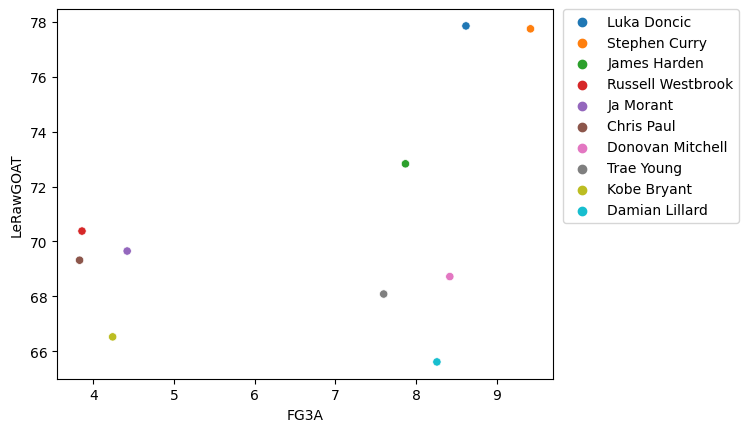

In [ ]:
G50 = SortedGuards.head(10)
ax = sns.scatterplot(data=G50, x='FG3A', y='LeRawGOAT', hue='Player')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

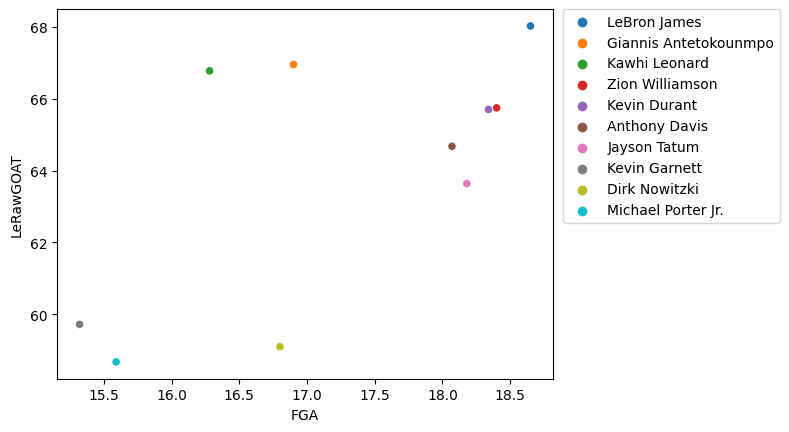

In [ ]:
F50 = pd.DataFrame(SortedForwards.head(10))
ax = sns.scatterplot(data=F50, x='FGA', y='LeRawGOAT', hue='Player')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

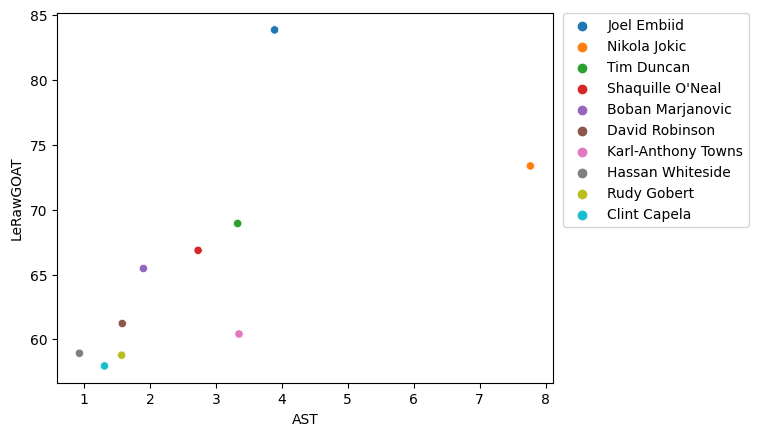

In [ ]:
C50 = SortedCenters.head(10)
ax = sns.scatterplot(data=C50, x='AST', y='LeRawGOAT', hue='Player')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)